In [11]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar100

In [ ]:
# Load the CIFAR-100 dataset

(train_x, train_y), (test_x, test_y) = cifar100.load_data(label_mode='fine')

In [ ]:
# Confirm that reloading the dataset does not require a download

(train_x, train_y), (test_x, test_y) = cifar100.load_data(label_mode='fine')

#### Examine the Dataset

In [ ]:
# Examine the shape of the data.

print(train_x.shape)
print(train_y.shape)

In [ ]:
# Examine one of the images and its corresponding label

plt.imshow(train_x[500])
print(train_y[500])

In [ ]:
# Load the list of labels from a JSON file

import json

with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [ ]:
# Print a few of the labels

cifar100_fine_labels[:10]

In [ ]:
# Print the corresponding label for the example above

cifar100_fine_labels[41]

#### Load the data using different label modes

In [ ]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_x[(train_y.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [ ]:
# Reload the data using the 'coarse' label mode

(train_x, train_y), (test_x, test_y) = cifar100.load_data(label_mode='coarse')
                                       

In [ ]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_x[(train_y.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [ ]:
# Load the list of coarse labels from a JSON file

with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [ ]:
# Print a few of the labels

cifar100_coarse_labels[:10]

In [ ]:
# Print the corresponding label for the example above

print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

#### Load the IMDB Dataset

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
# Load the IMDB dataset

(train_x, train_y), (test_x, test_y) = imdb.load_data()

In [ ]:
# Print an example from the training dataset, along with its corresponding label

print(f'label: {train_y[100]}')
print(train_x[100])

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_x]

In [ ]:
# Determine the maximum and minimum sequence length
print(max(sequence_lengths))
print(min(sequence_lengths))

#### Using Keyword Arguments

In [ ]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

(train_x, train_y), (test_x, test_y) = imdb.load_data(skip_top=50, oov_char=2)

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_x]

In [ ]:
# Determine the maximum and minimum sequence length

print(max(sequence_lengths))
print(min(sequence_lengths))

In [ ]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [ ]:
# Remove the oov_char from the sequences using the filter_list function

train_x = filter_list(train_x)

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_x]

In [ ]:
# Determine the maximum and minimum sequence length

print(max(sequence_lengths))
print(min(sequence_lengths))

***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [ ]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)

In [ ]:
# Print the shape of the DataFrame

fertility.shape

In [ ]:
# Show the head of the DataFrame

fertility.head()

#### Process the data

In [ ]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [ ]:
# Show the head of the DataFrame

fertility.head()

In [ ]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [ ]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [ ]:
# Show the head of the DataFrame

fertility.head()

In [ ]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [ ]:
# Show the head of the DataFrame

fertility.head()

*N.B. The below cell has been updated since the coding tutorial.*

In [ ]:
# Move the Output column such that it is the last column in the DataFrame

fertility = fertility.reindex(columns = [col for col in fertility.columns if col != 'Output'] + ['Output'])

In [ ]:
# Show the head of the DataFrame

fertility.head()

In [ ]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [ ]:
# Split the dataset into training and validation set

training = fertility[:70]
validation = fertility[70:]

In [ ]:
# Verify the shape of the training data

print(training.shape)
print(validation.shape)

In [ ]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [ ]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [ ]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [ ]:
# Test the generator using the next() function

print(next(train_generator))

#### Build the model

In [ ]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [ ]:
# Display the model summary to show the resultant structure

model.summary()

#### Compile the model

In [ ]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [ ]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [ ]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [ ]:
# Set the epochs to 3

epochs = 3

In [ ]:
# Train the model

for epoch in range(epochs):
    train_gen = get_generator(training_features, training_labels, batch_size=batch_size)
    val_gen = get_generator(validation_features, validation_labels, batch_size=len(validation_labels))

    model.fit_generator(train_gen, 
                        validation_data=val_gen, validation_steps=1, 
                        steps_per_epoch=train_steps)

In [ ]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_gen, steps_per_epoch=train_steps)

#### Make an infinitely looping generator

In [ ]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
            
        permuted = np.random.permutation(len(features))
        features = features[permuted]
        labels = labels[permuted]

In [ ]:
# Create a generator using this function.

train_gen_cyc = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [ ]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_gen_cyc)

In [ ]:
# Generate a cyclic validation generator

val_gen_cyc = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [ ]:
# Train the model

model.fit_generator(train_gen_cyc, 
                    validation_data=val_gen_cyc, validation_steps=1, 
                    steps_per_epoch=train_steps, epochs=epochs)

#### Evaluate the model and get predictions

In [ ]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [ ]:
# Get predictions on the validation data

preds = model.predict_generator(validation_generator, steps=1)
print(np.round(preds.T[0]))

In [ ]:
# Print the corresponding validation labels

print(validation_labels)

In [ ]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [ ]:
# Evaluate the model

model.evaluate(validation_generator)

***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

In [ ]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [ ]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [ ]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [ ]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

In [ ]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [ ]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [ ]:
# Create an ImageDataGenerator object

image_gen = ImageDataGenerator(
                preprocessing_function=monochrome,
                rotation_range=180,
                rescale=(1/255.0))

image_gen.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [ ]:
# Create an iterable generator using the `flow` function

image_gen_iter = image_gen.flow(training_features, training_labels,
                                batch_size=1, shuffle=False)

In [ ]:
# Show a sample from the generator and compare with the original

image, label = next(image_gen_iter)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image_orig[0,:,:,:])
axes[0].set_title('Original')
axes[1].imshow(image[0,:,:,:])
axes[1].set_title('Transformed')
plt.show()

#### Flow from directory

In [ ]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [ ]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [ ]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
# Create a training data generator

train_gen = datagenerator.flow_from_directory(train_path,
                                              batch_size=64, classes=classes,
                                              target_size=(16,16))

In [ ]:
# Create a validation data generator

val_gen = datagenerator.flow_from_directory(val_path,
                                            batch_size=64, classes=classes,
                                            target_size=(16,16))

In [ ]:
# Get and display an image and label from the training generator

x = next(train_gen)
imshow(x[0][4])
print(x[1][4])

In [ ]:
# Reset the training generator

train_gen = datagenerator.flow_from_directory(train_path,
                                              batch_size=64, 
                                              classes=classes, target_size=(16,16))

#### Create a model to train

In [ ]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [ ]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary

model.summary()

#### Train the model

In [ ]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_gen.n // train_gen.batch_size
val_steps = val_gen.n // val_gen.batch_size
print(train_steps_per_epoch, val_steps)

In [ ]:
# Fit the model

model.fit_generator(train_gen, 
                    steps_per_epoch=train_steps_per_epoch, epochs=5)

#### Evaluate the model

In [ ]:
# Evaluate the model

model.evaluate_generator(val_gen,
                         steps=val_steps)

#### Predict using the generator

In [ ]:
# Predict labels with the model

preds = model.predict(val_gen, steps=1)
np.argmax(preds, axis=1)

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [ ]:
x = np.zeros((100,10,2,2))

In [ ]:
# Create a dataset from the tensor x

ds1 = tf.data.Dataset.from_tensor_slices(x)

In [ ]:
# Inspect the Dataset object

print(ds1)
print(ds1.element_spec)

In [ ]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [ ]:
# Try creating a dataset from the tensor x2

ds2 = tf.data.Dataset.from_tensor_slices(x2)

In [ ]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [ ]:
# Create another dataset from the new x2 and inspect the Dataset object

ds2 = tf.data.Dataset.from_tensor_slices(x2)

In [ ]:
# Print the element_spec

print(ds2.element_spec)

#### Create a zipped dataset

In [ ]:
# Combine the two datasets into one larger dataset

ds_zip = tf.data.Dataset.zip((ds1, ds2))

In [ ]:
# Print the element_spec

print(ds_zip.element_spec)

In [ ]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [ ]:
# Find the number of batches in the zipped Dataset

get_batches(ds_zip)

#### Create a dataset from numpy arrays

In [ ]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

In [ ]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [ ]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

In [ ]:
# Inspect the length of an element using the take method

ele = next(iter(mnist_dataset.take(1)))

In [ ]:
# Examine the shapes of the data

print(ele[0].shape)
print(ele[1].shape)

#### Create a dataset from text data

In [ ]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

In [ ]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

In [ ]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [ ]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

In [ ]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

In [ ]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

#### Interleave lines from the text data files

In [ ]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

In [ ]:
# Interleave the lines from the text files

interleave_sp_ds = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)
print(interleave_sp_ds.element_spec)

In [ ]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleave_sp_ds.take(10))]
for line in lines:
    print(line)

***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

In [2]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [3]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [5]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [6]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [7]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [8]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 1, 0)","(0,)",2143,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
1,44,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",29,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
2,33,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 1, 0, 0)","(0,)",2,"(1,)","(1,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
3,47,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 0, 1)","(0,)",1506,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
4,33,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",single,"(0, 0, 0, 1)","(0,)",1,"(0,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no


*N.B. The below cell has been updated to correct the name of a variable and differs from the Coding Tutorial video.*

In [9]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

*N.B. Please use ``bank_dataframe.to_dict(orient='list')`` to convert the correct dataframe to a dictionary suitable for use in the ``from_tensor_slices`` function, rather than ``dict(dataframe)`` as specified in the coding tutorial video.*

In [12]:
# Convert the DataFrame to a Dataset

bank_ds = tf.data.Dataset.from_tensor_slices(bank_dataframe.to_dict(orient='list'))

In [13]:
# Inspect the Dataset object

bank_ds.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [14]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_ds)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'married'


In [15]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_ds = bank_ds.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [16]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [17]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
    x['y'] = 0 if (x['y'] == tf.constant([b'no'], dtype=tf.string)) else 1
    return x

bank_ds = bank_ds.map(map_label)

In [18]:
# Inspect the Dataset object

bank_ds.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [19]:
# Remove the 'marital' column

bank_ds = bank_ds.map(lambda x: {key:val for key,val in x.items() if key != 'marital'})

In [20]:
# Inspect the Dataset object

bank_ds.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [21]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [22]:
# Map this function over the dataset

bank_ds = bank_ds.map(map_feature_label)

In [23]:
# Inspect the Dataset object

bank_ds.element_spec

(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [24]:
# Determine the length of the Dataset

dataset_length = 0

for _ in bank_ds:
    dataset_length += 1
    
print(dataset_length)

5207


In [25]:
# Make training and validation sets from the dataset

training_ele = int(dataset_length * 0.7)
train_ds = bank_ds.take(training_ele)
val_ds = bank_ds.skip(training_ele)

#### Build a classification model

Now let's build a model to classify the features.

In [26]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [27]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Show the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense (Dense)                (None, 400)               12400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 176,521
Trainable params: 174,861
Non-trainable params: 1,660
______________________________________________

#### Train the model

In [29]:
# Create batched training and validation datasets

train_dataset = train_ds.batch(20, drop_remainder=True)
valid_dataset = val_ds.batch(100)

In [30]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(1000)

In [31]:
train_ds, train_ds.element_spec

(<TakeDataset shapes: ((30,), ()), types: (tf.int32, tf.int32)>,
 (TensorSpec(shape=(30,), dtype=tf.int32, name=None),
  TensorSpec(shape=(), dtype=tf.int32, name=None)))

In [32]:
# Fit the model

history = model.fit(train_dataset,
                    validation_data=valid_dataset,
                    epochs=5)

Epoch 1/5
182/182 [==============================] - 21s 118ms/step - loss: 0.6620 - accuracy: 0.6467 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
182/182 [==============================] - 21s 114ms/step - loss: 0.4801 - accuracy: 0.8234 - val_loss: 0.5010 - val_accuracy: 0.8362
Epoch 3/5
182/182 [==============================] - 21s 116ms/step - loss: 0.3757 - accuracy: 0.8915 - val_loss: 0.4047 - val_accuracy: 0.8663
Epoch 4/5
182/182 [==============================] - 19s 105ms/step - loss: 0.3034 - accuracy: 0.9190 - val_loss: 0.4201 - val_accuracy: 0.8612
Epoch 5/5
182/182 [==============================] - 18s 100ms/step - loss: 0.2558 - accuracy: 0.9283 - val_loss: 0.4117 - val_accuracy: 0.8612


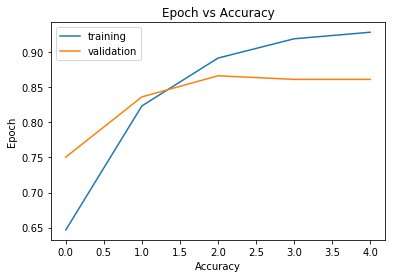

In [33]:
# Plot the training and validation accuracy

plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.ylabel('Epoch')
plt.xlabel('Accuracy')
plt.show()